In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image, ImageOps
from scipy.spatial import cKDTree
from skimage.feature import plot_matches
from skimage.measure import ransac
from skimage.transform import AffineTransform
from six import BytesIO
import tensorflow as tf
import tensorflow_hub as hub
from six.moves.urllib.request import urlopen

import glob
import os
from itertools import accumulate

np.random.seed(10)

In [2]:
df = pd.read_csv('./DATASET/Dataset.csv')

In [3]:
df.head()

,Sl No.,Landmark_ID,Name,noisy pics,URL
0,1,1,"Parthenon, Athens",NaN,https://upload.wikimedia.org/wikipedia/commons...
1,2,1,"Parthenon, Athens",NaN,https://i.ytimg.com/vi/tWDflkBZC6U/maxresdefau...
2,3,1,"Parthenon, Athens",NaN,https://cdn.kastatic.org/ka-perseus-images/2f4...
3,4,1,"Parthenon, Athens",y,https://s27363.pcdn.co/wp-content/uploads/2019...
4,5,1,"Parthenon, Athens",y,https://atrott01.files.wordpress.com/2014/05/d...


# Get the Images and Resize 

In [17]:
def resize_image(srcfile, destfile, new_width=256, new_height=256):
    pil_image = Image.open(srcfile)
    pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
    pil_image_rgb = pil_image.convert('RGB')
    pil_image_rgb.save(destfile, format='JPEG', quality=90)
    return destfile
def resize_images_folder(srcfolder, destfolder='./DATASET/resized', new_width=256, new_height=256):
    os.makedirs(destfolder,exist_ok=True)
    for i in range(1, 21):
        for srcfile in glob.iglob(os.path.join(srcfolder, str(i), '*.[Jj][Pp][Gg]')):
            src_basename = os.path.basename(srcfile)
            destfile=os.path.join(destfolder,src_basename)
            resize_image(srcfile, destfile, new_width, new_height)
    return destfolder
def get_resized_db_image_paths(destfolder='./DATASET/resized'):
    return sorted(list(glob.iglob(os.path.join(destfolder, '*.[Jj][Pp][Gg]'))))

In [18]:
resize_images_folder('./DATASET/Landmark Images')
db_images = get_resized_db_image_paths()

In [19]:
db_images

['./DATASET/resized\\1.jpg',
 './DATASET/resized\\10.jpg',
 './DATASET/resized\\100.jpg',
 './DATASET/resized\\101.jpg',
 './DATASET/resized\\102.jpg',
 './DATASET/resized\\103.jpg',
 './DATASET/resized\\104.jpg',
 './DATASET/resized\\105.jpg',
 './DATASET/resized\\106.jpg',
 './DATASET/resized\\107.jpg',
 './DATASET/resized\\108.jpg',
 './DATASET/resized\\109.jpg',
 './DATASET/resized\\11.jpg',
 './DATASET/resized\\110.jpg',
 './DATASET/resized\\111.jpg',
 './DATASET/resized\\112.jpg',
 './DATASET/resized\\113.jpg',
 './DATASET/resized\\114.jpg',
 './DATASET/resized\\115.jpg',
 './DATASET/resized\\116.jpg',
 './DATASET/resized\\117.jpg',
 './DATASET/resized\\118.jpg',
 './DATASET/resized\\119.jpg',
 './DATASET/resized\\12.jpg',
 './DATASET/resized\\120.jpg',
 './DATASET/resized\\121.jpg',
 './DATASET/resized\\122.jpg',
 './DATASET/resized\\123.jpg',
 './DATASET/resized\\124.jpg',
 './DATASET/resized\\125.jpg',
 './DATASET/resized\\126.jpg',
 './DATASET/resized\\127.jpg',
 './DATASET/r

In [20]:
delf = hub.load('https://tfhub.dev/google/delf/1').signatures['default']

In [21]:
def run_delf(image):
  np_image = np.array(image)
  float_image = tf.image.convert_image_dtype(np_image, tf.float32)

  return delf(
      image=float_image,
      score_threshold=tf.constant(100.0),
      image_scales=tf.constant([0.25, 0.3536, 0.5, 0.7071, 1.0, 1.4142, 2.0]),
      max_feature_num=tf.constant(1000))

In [22]:
RESULT = []
for i in range(len(db_images)):
    image = Image.open(db_images[i])
    res = run_delf(image)
    RESULT.append(res)

In [23]:
# make query folder and take images from there --> ./QUERY/fileame.jpg
image1 = Image.open('mtfuji.jpg')
image1 = ImageOps.fit(image1, (256, 256), Image.ANTIALIAS)
result1 = run_delf(image1)

Loaded image 1's 121 features
Loaded image 2's 184 features
Found 3 inliers


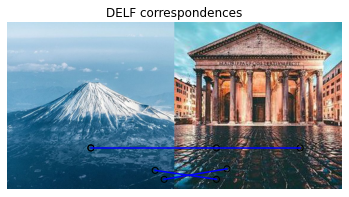

Loaded image 1's 121 features
Loaded image 2's 132 features
no inliers


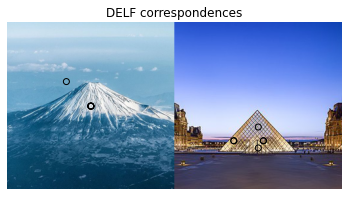

Loaded image 1's 121 features
Loaded image 2's 174 features
no inliers


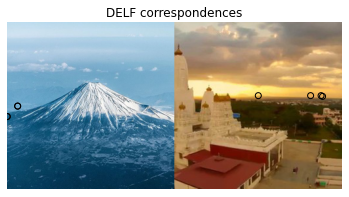

Loaded image 1's 121 features
Loaded image 2's 251 features
Found 4 inliers


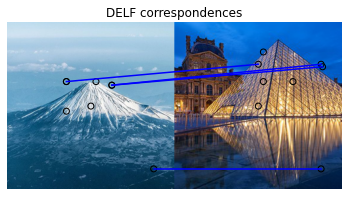

Loaded image 1's 121 features
Loaded image 2's 146 features
no inliers


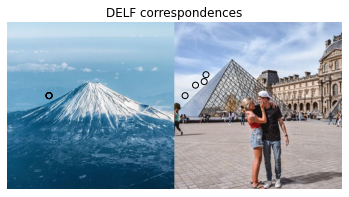

Loaded image 1's 121 features
Loaded image 2's 210 features
Found 4 inliers


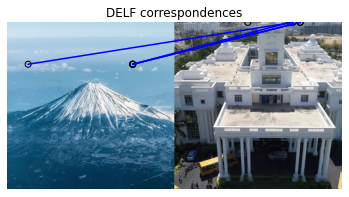

Loaded image 1's 121 features
Loaded image 2's 235 features
Found 6 inliers


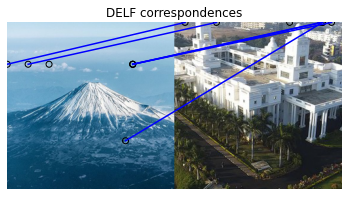

Loaded image 1's 121 features
Loaded image 2's 264 features
Found 6 inliers


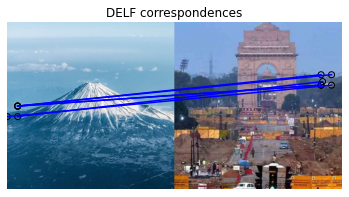

Loaded image 1's 121 features
Loaded image 2's 187 features
Found 3 inliers


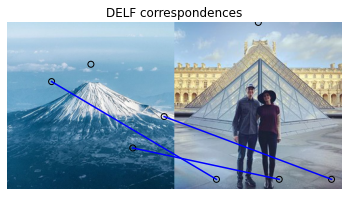

Loaded image 1's 121 features
Loaded image 2's 255 features
Found 8 inliers


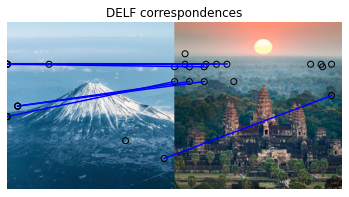

Loaded image 1's 121 features
Loaded image 2's 205 features
no inliers


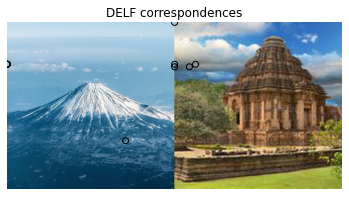

Loaded image 1's 121 features
Loaded image 2's 184 features
Found 12 inliers


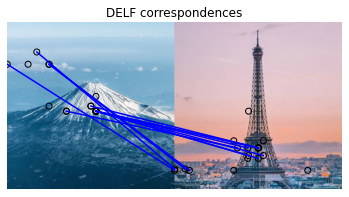

Loaded image 1's 121 features
Loaded image 2's 227 features
Found 16 inliers


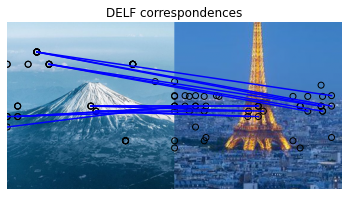

Loaded image 1's 121 features
Loaded image 2's 162 features
Found 5 inliers


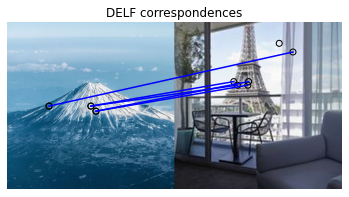

Loaded image 1's 121 features
Loaded image 2's 211 features
Found 6 inliers


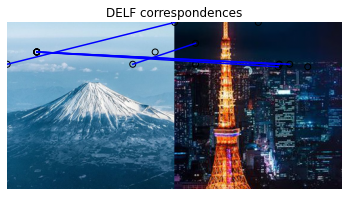

Loaded image 1's 121 features
Loaded image 2's 211 features
Found 6 inliers


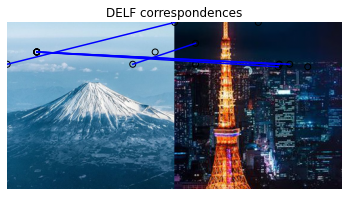

Loaded image 1's 121 features
Loaded image 2's 215 features
no inliers


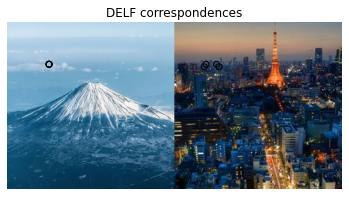

Loaded image 1's 121 features
Loaded image 2's 170 features
Found 24 inliers


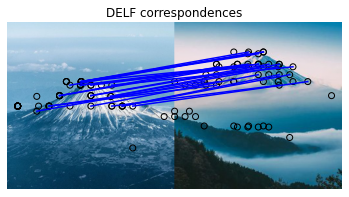

Loaded image 1's 121 features
Loaded image 2's 177 features
Found 4 inliers


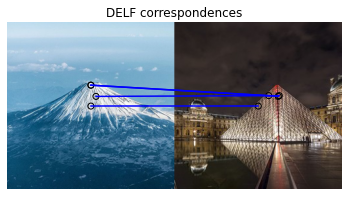

Loaded image 1's 121 features
Loaded image 2's 222 features
no inliers


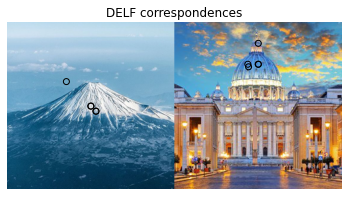

Loaded image 1's 121 features
Loaded image 2's 122 features
Found 8 inliers


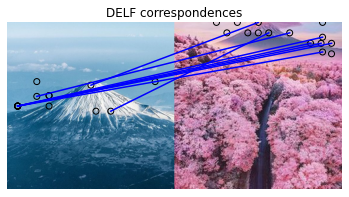

Loaded image 1's 121 features
Loaded image 2's 161 features
Found 3 inliers


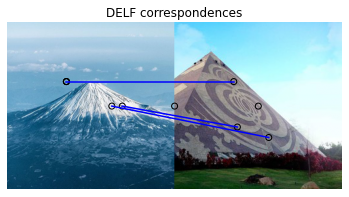

Loaded image 1's 121 features
Loaded image 2's 139 features
Found 4 inliers


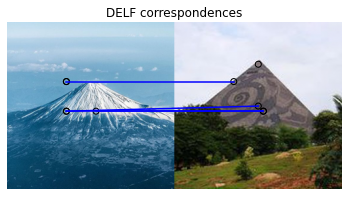

Loaded image 1's 121 features
Loaded image 2's 151 features
Found 4 inliers


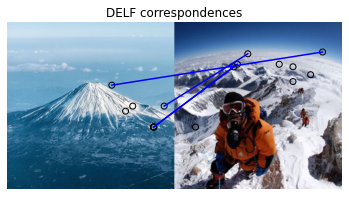

Loaded image 1's 121 features
Loaded image 2's 118 features
Found 28 inliers


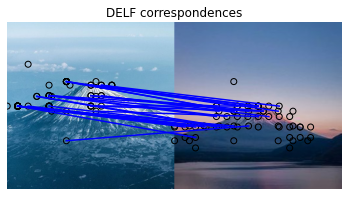

Loaded image 1's 121 features
Loaded image 2's 121 features
Found 118 inliers


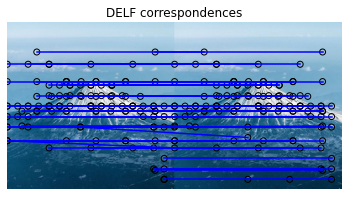

In [24]:
inliers_counts = []
for i in range(len(db_images)):
    distance_threshold = 0.8
    image2 = Image.open(db_images[i])
    index_of_db = i
    result2 = RESULT[i]
    # Read features.
    num_features_1 = result1['locations'].shape[0]
    

    num_features_2 = result2['locations'].shape[0]
    

    # Find nearest-neighbor matches using a KD tree.
    d1_tree = cKDTree(result1['descriptors'])
    _, indices = d1_tree.query(
      result2['descriptors'],
      distance_upper_bound=distance_threshold)

    # Select feature locations for putative matches.
    locations_2_to_use = np.array([result2['locations'][i,] for i in range(num_features_2) if indices[i] != num_features_1])
    locations_1_to_use = np.array([
      result1['locations'][indices[i],]
      for i in range(num_features_2)
      if indices[i] != num_features_1
    ])

    # Perform geometric verification using RANSAC.
    try:
        _, inliers = ransac(
          (locations_1_to_use, locations_2_to_use),
          AffineTransform,
          min_samples=3,
          residual_threshold=20,
          max_trials=1000)
        print("Loaded image 1's %d features" % num_features_1)
        print("Loaded image 2's %d features" % num_features_2)
        if inliers is None or len(inliers) == 0:
            print("no inliers")
        else:
            inliers_counts.append({"index": index_of_db, "inliers": sum(inliers)})
            print('Found %d inliers' % sum(inliers))
    except:
        continue

    # Visualize correspondences.
    _, ax = plt.subplots()
    inlier_idxs = np.nonzero(inliers)[0]
    plot_matches(
      ax,
      image1,
      image2,
      locations_1_to_use,
      locations_2_to_use,
      np.column_stack((inlier_idxs, inlier_idxs)),
      matches_color='b')
    ax.axis('off')
    ax.set_title('DELF correspondences')
    plt.show()

In [21]:
top_match = sorted(inliers_counts, key=lambda k: k['inliers'], reverse=True)[0]

# index = top_match['index']
# loc = db_images[index]
# array = loc.split('\\')
# name = array[1].split('.')
# print('Best guess for this image:', name[0])

result_image = db_images[top_match['index']].split('\\')[1].split('.')
result_image_info = df.iloc[int(result_image[0])-1]
print("The Queried Image is: " + result_image_info[2])

The Queried Image is: Global Academy of Technology, RR Nagar, Bangalore
